In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df =  pd.read_csv('carvana.csv')
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [220]:
df.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [221]:
df.Year.unique()

array([    2018,     2020,     2012,     2019,    20173,     2016,
           2017,     2015,     2014,     2010,    20194,    20165,
           2013,    20133,     2011,  2013500,  2017124,     2021,
           2022,   201650,    20163,    20215,    20113,    20152,
       20141500,   202130,    20204,    20153,  2014500,  2016500,
          20103,    20156,  2017500,   201040,  2013300,  2015200,
        2013150,    20125,    20185,    20166,    20146,    20213,
         202180,   201860,    20184,    20203,    20143,    20144,
         201550,   202050,   202150,    20199,    20219,    20205,
         201730,   202060,  2018500,  2015500,  2010370,   201750,
          20174,   201360,   200970,    20193,    20145,    20164,
          20123,    20176,  2016200,   201560,  2015900,    20161,
        2016900,    20154,    20182,    20157,  2019500,    20183,
          20122,    20129,    20114,  2020150, 20211500,    20135,
          20196,  2014200, 20201500,    20195,    20134,    20

In [222]:
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [223]:
df['Year_reduced'] = df['Year'].apply(lambda x: int(str(x)[0:4]))
df

,Name,Year,Miles,Price,Year_reduced
0,Chevrolet Trax,2018,41946,16990,2018
1,GMC Terrain,2020,45328,23990,2020
2,Jeep Wrangler,2012,81068,21590,2012
3,Jeep Renegade,2019,35372,21590,2019
4,BMW X,20173,68992,22990,2017
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,2014
21996,Dodge Charger,2016,62616,23990,2016
21997,Ford Taurus,2013,50345,16990,2013
21998,Toyota Corolla Hatchback,2020,27945,23990,2020


In [224]:
df.Year_reduced.unique()

array([2018, 2020, 2012, 2019, 2017, 2016, 2015, 2014, 2010, 2013, 2011,
       2021, 2022, 2009, 2023])

array([[<AxesSubplot: title={'center': 'Year_reduced'}>]], dtype=object)

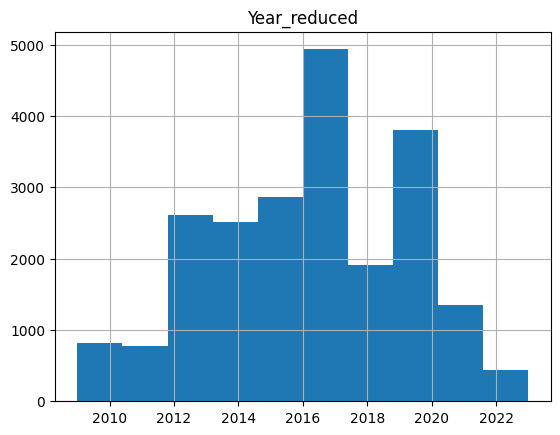

In [225]:
df.hist('Year_reduced')

In [226]:
df[df['Year_reduced']==2023]

,Name,Year,Miles,Price,Year_reduced
3783,MINI Hardtop Door,20232,495,35590,2023
4157,MINI Hardtop Door,20232,495,35590,2023
4524,MINI Hardtop Door,20232,495,35590,2023
4713,MINI Hardtop Door,20232,495,35590,2023
5695,Kia Carnival,2023,4457,43590,2023
5986,Chevrolet Corvette,2023,2982,94590,2023


In [227]:
df.drop(df[df['Year_reduced']>2022].index, axis=0, inplace=True)

In [228]:
df.describe()

,Year,Miles,Price,Year_reduced
count,2.199400e+04,21994.000000,21994.000000,21994.000000
mean,1.947141e+05,54460.121942,20700.178821,2016.111667
std,1.630590e+06,25674.570267,6512.535570,3.008617
min,2.009000e+03,53.000000,10990.000000,2009.000000
25%,2.014000e+03,35565.000000,16590.000000,2014.000000
50%,2.017000e+03,51894.000000,19590.000000,2016.000000
75%,2.020000e+03,73191.000000,22990.000000,2019.000000
max,2.022350e+07,120167.000000,102990.000000,2022.000000


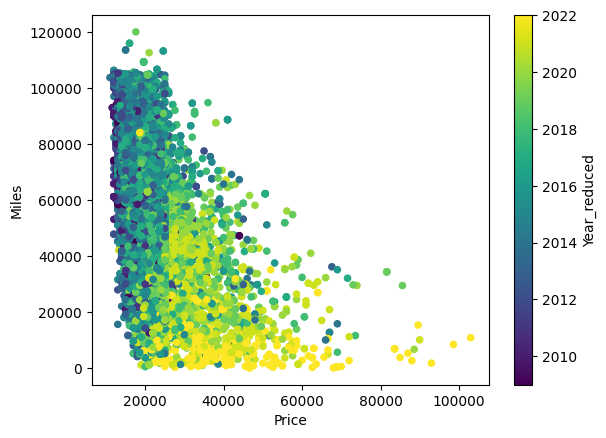

In [229]:
ax2 = df.plot.scatter(x='Price',
                      y='Miles',
                      c='Year_reduced',
                      colormap='viridis')

In [230]:
cormat = df.corr()
cormat_reduced = cormat.drop(['Year']).drop(['Year'], axis=1)
round(cormat_reduced,2)

/tmp/ipykernel_9244/4055011234.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


,Miles,Price,Year_reduced
Miles,1.00,-0.47,-0.48
Price,-0.47,1.00,0.49
Year_reduced,-0.48,0.49,1.00


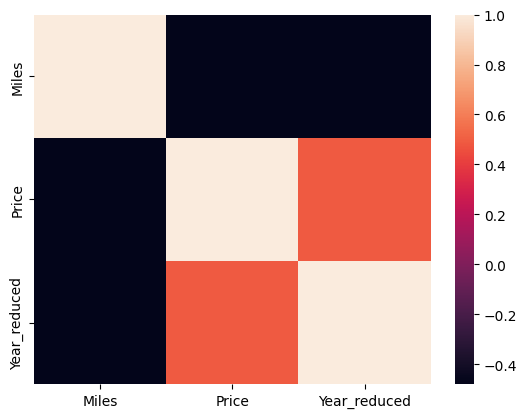

In [231]:
sns.heatmap(cormat_reduced);

In [232]:
df.shape

(21994, 5)

In [233]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [234]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

transformer = ColumnTransformer(transformers=[("num_preprocess", MinMaxScaler(), ["Miles", "Year_reduced"]),
                                ('onehotencoder', ohe, ['Name'])],
                 remainder='passthrough', n_jobs=-1)

In [235]:
msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

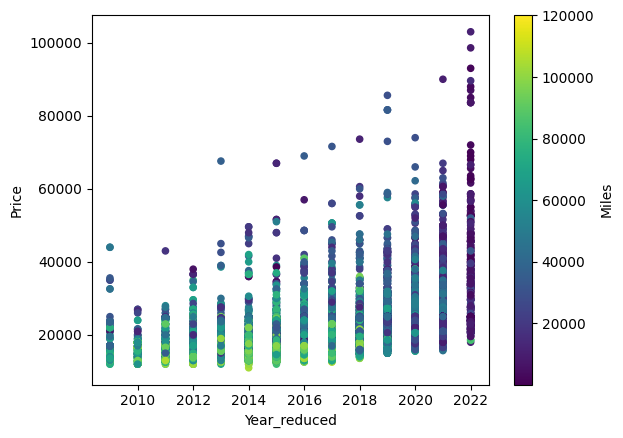

In [236]:
ax11 = train.plot.scatter(x='Year_reduced',
                      y='Price',
                      c='Miles',
                      colormap='viridis')

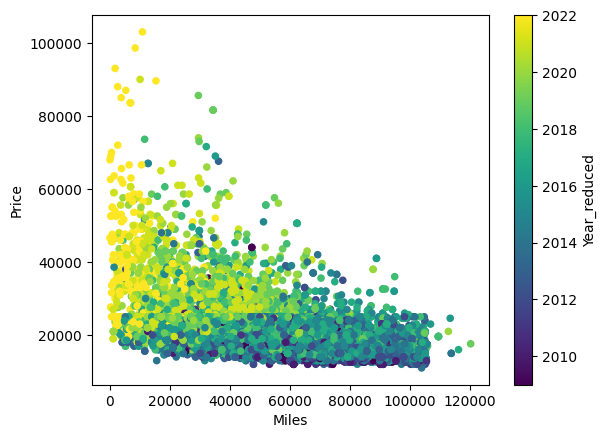

In [237]:
ax12 = train.plot.scatter(x='Miles',
                      y='Price',
                      c='Year_reduced',
                      colormap='viridis')

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X = df.drop(['Price'],axis=1) 
y = df[['Price']]

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [241]:
from sklearn import linear_model

In [242]:
x_train = transformer.fit_transform(X_train)
x_test = transformer.transform(X_test)

/home/mohsen/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [243]:
x_train.shape,y_train.shape

((17595, 413), (17595, 1))

In [244]:
mlr = linear_model.LinearRegression()

In [245]:
mlr.fit(x_train,y_train.values.ravel())
print('coefficients : ', mlr.coef_)

coefficients :  [-2.43511876e-10  2.73592236e-10 -1.08986603e-11  4.69767997e-13
  1.16505560e-13  1.24407138e-14 -6.87900794e-13  6.81067295e-13
 -1.59232243e-12  7.64752858e-13  1.05291288e-12  5.58061961e-13
  5.39838983e-12  1.82207264e-12  1.05451618e-12  3.17860002e-13
  1.83009779e-13  2.58415515e-11  5.23086050e-12  1.01772538e-11
  1.33685883e-12 -8.73337166e-13  7.55518741e-13  2.64679366e-12
 -4.08147896e-12  8.69211683e-13  2.10660661e-12 -1.85962225e-12
 -1.98262759e-13 -6.39942731e-13  1.17792450e-13 -2.37112796e-12
  1.15082663e-12  3.81493316e-12  5.56651499e-13 -7.21210360e-13
  1.72575353e-13  8.74508297e-13  7.66505703e-14  1.84274866e-12
  3.40809125e-15  3.30436237e-12  9.45143209e-14  1.25546009e-11
 -2.55172846e-12 -1.48499904e-14  2.33498881e-12  3.05217794e-13
  1.42894979e-11 -1.81777861e-11 -2.55373475e-12 -6.44068726e-12
 -1.03670283e-12 -1.43479856e-13 -3.35248428e-12 -2.32781293e-14
  5.15881833e-12  2.02011884e-12  3.97567229e-12  1.10809877e-12
  1.26181

In [246]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [250]:
y_pred = mlr.predict(x_test)
    
print(f"R2 Score : {r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Sqaured Error Score : {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test,y_pred, squared=False)}")


R2 Score : 0.01852403615764131
Mean Absolute Error Score : 4261.287855022026
Mean Sqaured Error Score : 41148044.111762725
Root Mean Squared Error: 6414.674123582797
